# Classification using Machine Learning using Logistic Regression as the Classifier

# Project done by Meghana Vasudeva Person # 50290586 

In [1067]:
#imports required
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re

In [1068]:
#Loading the data
def load_data():
    cols = ['id_number', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 
         'fractal_dimension_mean', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst']
    data = pd.read_csv('Cancer.csv',header=None,names=cols)
    return data

In [1069]:
cancer_df = load_data()
cancer_df.head(10)

,id_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [1071]:
#Number of Benign and Malignant cells
cancer_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

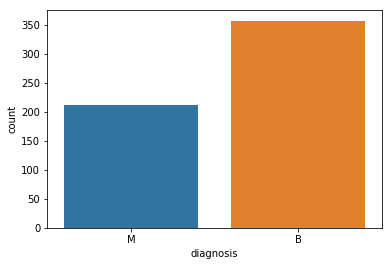

In [1072]:
#Visualize the count of M and B
import seaborn as sns
sns.countplot(cancer_df['diagnosis'],label='count')

In [1073]:
cancer_df.iloc[:,0].head()

0      842302
1      842517
2    84300903
3    84348301
4    84358402
Name: id_number, dtype: int64

In [1074]:
#Dropping unnecessary columns
cancer_df=cancer_df.drop(columns="id_number")
cancer_df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [1075]:
#Converting Categorical data inro numerical values 
cancer_df['diagnosis']=cancer_df['diagnosis'].map({'M':1,'B':0})
cancer_df.head(100)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.1442,0.25760,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.1654,0.36820,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.1703,0.54010,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.1853,1.05800,1.10500,0.22100,0.4366,0.20750


C:\Users\megz1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\megz1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


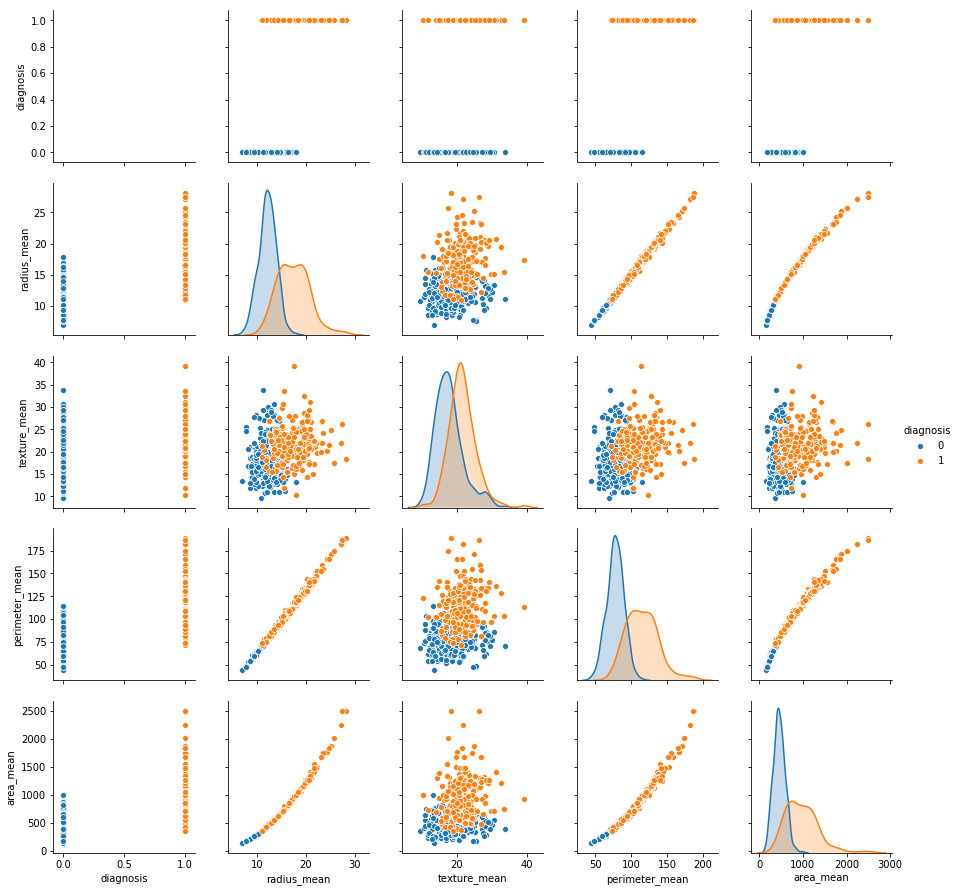

In [1076]:
#Create a pair plot to check diagnosis points
sns.pairplot(cancer_df.iloc[:,0:5],hue="diagnosis")

In [1077]:
#Visualize the correlation
cancer_df.iloc[:,0:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925
concave_points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379


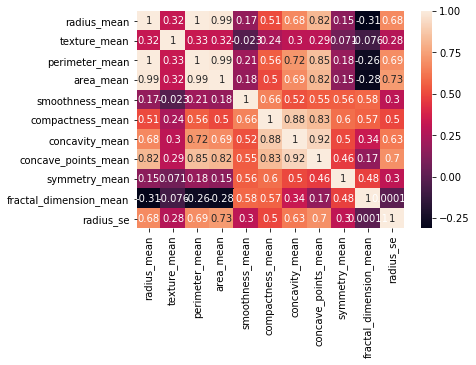

In [1078]:
#Heatmap for correlation between the axises 
sns.heatmap(cancer_df.iloc[:,1:12].corr(),annot=True)

In [1079]:
cancer_df.columns
feature_df = cancer_df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [1080]:
feature_df.shape
cancer_df.shape
feature_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [1081]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave_points_se          569 no

In [1082]:
#Split the dataset in X independent and Y dependent dataset
X = (feature_df - np.min(feature_df))/(np.max(feature_df) - np.min(feature_df)).values
Y = cancer_df.iloc[:, 0].values
Y=Y.reshape((569,1))

In [1083]:
#Splitting the data into 80% Train 10% test and 10% val
from sklearn.model_selection import train_test_split
X_train, X_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1, test_size=0.5, random_state=0)

In [1084]:
#Checking the size of all the arrays
print(y_val.shape)
print(y_test.shape)
print(y_train.shape)
print(X_val.shape)
print(X_test.shape)
print(X_train.shape)
X_test

(57, 1)
(57, 1)
(455, 1)
(57, 30)
(57, 30)
(455, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
414,0.385678,0.679743,0.365697,0.244327,0.275977,0.081805,0.109794,0.136133,0.400000,0.062763,...,0.331910,0.663380,0.297276,0.183396,0.288120,0.069244,0.123562,0.225945,0.328800,0.043356
434,0.372900,0.244505,0.353120,0.224899,0.330505,0.157536,0.078397,0.142992,0.259091,0.148905,...,0.298115,0.227079,0.258429,0.145571,0.334346,0.123905,0.097444,0.273918,0.189237,0.086777
515,0.206304,0.300981,0.200193,0.105069,0.471879,0.201245,0.100797,0.128926,0.437879,0.255897,...,0.161508,0.293443,0.143135,0.072110,0.509344,0.126233,0.129712,0.293540,0.294697,0.083891
463,0.218609,0.292526,0.207933,0.114189,0.292949,0.120146,0.078889,0.088320,0.230303,0.181761,...,0.172181,0.319829,0.160715,0.076165,0.416232,0.148936,0.148562,0.284811,0.324266,0.154729
85,0.543282,0.297937,0.534241,0.395122,0.416268,0.263542,0.312793,0.437127,0.541414,0.216091,...,0.533618,0.417377,0.506948,0.348457,0.453213,0.176199,0.252157,0.564261,0.419870,0.201692
268,0.278716,0.219817,0.266671,0.156394,0.375734,0.131311,0.091378,0.080268,0.479798,0.162805,...,0.212380,0.309701,0.193536,0.101332,0.359440,0.148936,0.159105,0.198625,0.401932,0.102191
512,0.303800,0.365573,0.309930,0.175270,0.523337,0.391142,0.338566,0.406163,0.533333,0.490522,...,0.301672,0.470149,0.313213,0.162013,0.569438,0.347634,0.407827,0.704811,0.398186,0.366391
140,0.130484,0.076429,0.120586,0.061506,0.359935,0.066376,0.000000,0.000000,0.425758,0.300337,...,0.095695,0.055437,0.080283,0.038758,0.344912,0.043417,0.000000,0.000000,0.303568,0.173619
364,0.303800,0.244843,0.288093,0.173446,0.241401,0.115269,0.051101,0.073211,0.297980,0.148484,...,0.241907,0.257996,0.215897,0.117553,0.331044,0.136129,0.108946,0.240103,0.231815,0.136298
348,0.212457,0.213730,0.201990,0.109947,0.344227,0.121097,0.060614,0.115408,0.289899,0.289806,...,0.162931,0.233742,0.145724,0.071422,0.541042,0.082186,0.078458,0.225017,0.253499,0.213761


In [1085]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val = sc.fit_transform(X_val)
print(X_test.shape)
print(X_train.shape)


(57, 30)
(455, 30)


In [1086]:
def lgmodels():
#Calling the model function to train a Logistic Regression Model on Training Data
    d= model(X_train.T, y_train.T, num_of_iterations=620, learningrate=0.06)
    
        
    costs=d["costs"]
    w=d["w"]
    b=d["b"]
    
    #Drawing the plot between cost and number of iterations
    plt.plot(costs)
    plt.title("Cost vs #Iterations")
    plt.xlabel("Number of Iterations ( * 10)")
    plt.ylabel("Cost")
    
   
    
    #Now, calculating the accuracy on Training  Test and Valid Data
    Y_prediction_train = predict(X_train.T, w, b)
    Y_prediction_test = predict(X_test.T, w, b)
    Y_prediction_val = predict(X_val.T, w, b)
    
    
    Training_acc = 100 - np.mean(np.abs(Y_prediction_train - y_train.T)) * 100
    Testing_acc = 100 - np.mean(np.abs(Y_prediction_test - y_test.T)) * 100
    Val_acc = 100 - np.mean(np.abs(Y_prediction_val - y_val.T)) * 100
    
    
    print("\nTrain accuracy: {} %".format(Training_acc))
    
    print("\nTest accuracy: {} %".format(Testing_acc))
    print("\n Val accuracy: {} %".format(Val_acc))
    
    
  

In [1087]:
#Function to initialize the weights and bias
def initialize(m):
    
    w = np.zeros((m,1))
    b = 0
    
    return w , b

In [1088]:
#Function to calculate sigmoid of x    
def sigmoid(X):
    return 1/(1 + np.exp(- X))    


In [1089]:
#function to find the cost
def prop(X, Y, w, b):
    
    m = X.shape[1] #Number of training examples
    Z = np.dot(w.T, X) + b;    
    A = sigmoid(Z) #Applying sigmoid
    cost= -(1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A)) # the cost equation
    
    dw = (1/m)* np.dot(X, (A-Y).T)
    db = (1/m)* np.sum(A-Y)
    
    grads= {"dw" : dw, "db" : db}
    
    return grads, cost
    

In [1090]:
#Function for performing Grdient Descent
def gd(X, Y, w, b, num_of_iterations, learningrate):
    
    costs=[] 
    
    for i in range(num_of_iterations):
 
        grads, cost = prop(X, Y, w, b)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learningrate * dw
        b = b - learningrate * db
        
        #Storing tthe cost at interval of every 10 iterations
        if i% 10 == 0:
            costs.append(cost)
            print("cost after %i iteration : %f" % (i, cost))
            
            
    parameters = {"w":w, "b":b}
    grads = {"dw":dw, "db":db}
    
    
    return parameters, grads, costs

In [1091]:

#Function for doing the predictions on the data set (mapping probabilities to 0 or 1)
def predict(X, w, b):
    
    m = X.shape[1] #Number of training examples
    
    y_prediction =  np.zeros((1,m))
    
    w = w.reshape(X.shape[0], 1)
    
    A=sigmoid(np.dot(w.T, X)+b)
    
    
    for i in range(A.shape[1]):
        
        if(A[0,i]<0.5):
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
            
    
    return y_prediction


In [1092]:
#Function for calculating the Logistic Regression Model
def model(X_train, y_train, num_of_iterations, learningrate):
    
    dim = X_train.shape[0] #Number of features
    
    w,b = initialize(dim)
    
    parameters, grads, costs = gd(X_train, y_train, w, b, num_of_iterations, learningrate) 
    
    w = parameters["w"]
    b = parameters["b"]
        
    
    d={"w":w, "b":b, "costs": costs}
    
    return d
    

cost after 0 iteration : 0.693147
cost after 10 iteration : 0.304664
cost after 20 iteration : 0.229557
cost after 30 iteration : 0.193816
cost after 40 iteration : 0.172142
cost after 50 iteration : 0.157364
cost after 60 iteration : 0.146539
cost after 70 iteration : 0.138209
cost after 80 iteration : 0.131562
cost after 90 iteration : 0.126109
cost after 100 iteration : 0.121537
cost after 110 iteration : 0.117635
cost after 120 iteration : 0.114257
cost after 130 iteration : 0.111296
cost after 140 iteration : 0.108675
cost after 150 iteration : 0.106333
cost after 160 iteration : 0.104225
cost after 170 iteration : 0.102315
cost after 180 iteration : 0.100573
cost after 190 iteration : 0.098977
cost after 200 iteration : 0.097507
cost after 210 iteration : 0.096148
cost after 220 iteration : 0.094887
cost after 230 iteration : 0.093712
cost after 240 iteration : 0.092614
cost after 250 iteration : 0.091586
cost after 260 iteration : 0.090619
cost after 270 iteration : 0.089708
cos

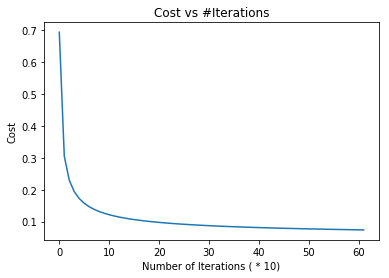

In [1093]:

#Calling the model function to start the program
lgmodels()

In [1094]:
from sklearn import preprocessing
mmscaler=preprocessing.MinMaxScaler()

#w = w.reshape(X_test.shape[0], 1)
Z_test = np.dot(w.T,X_test.T) + b;#   () 
A_test = sigmoid(Z_test)
A_test=np.sum(A_test,axis=0)
A_test=mmscaler.fit_transform(A_test.reshape(-1,1))

print (A_test)
  
A_test[A_test > 0.5] = 1
A_test[A_test <= 0.5] = 0
print (A_test)

[[0.        ]
 [0.08962546]
 [0.02446692]
 [0.05406538]
 [0.36262874]
 [0.03661217]
 [0.36190249]
 [0.53865522]
 [0.09373581]
 [0.18361909]
 [0.36164608]
 [0.11016494]
 [0.36468013]
 [0.3613634 ]
 [0.156567  ]
 [0.04661932]
 [0.10689687]
 [0.01237331]
 [0.37012163]
 [0.4050809 ]
 [0.41921662]
 [0.36139378]
 [0.36156703]
 [0.36134054]
 [0.36139561]
 [0.36172311]
 [0.62434604]
 [0.13447426]
 [0.14783607]
 [0.36254809]
 [0.19034582]
 [0.12136372]
 [0.39359705]
 [0.27541096]
 [0.27313145]
 [0.36130997]
 [1.        ]
 [0.58528867]
 [0.00795951]
 [0.36421334]
 [0.16999776]
 [0.04198538]
 [0.36918678]
 [0.02398624]
 [0.3504689 ]
 [0.02304255]
 [0.32987939]
 [0.10670517]
 [0.36253502]
 [0.55751725]
 [0.62290706]
 [0.03859096]
 [0.08800377]
 [0.36131551]
 [0.39593911]
 [0.08102521]
 [0.26622382]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0

In [1095]:
#Confusion Matrix to classify accuracy precision and recall

from sklearn.metrics import confusion_matrix, classification_report, precision_score
print(classification_report(y_test, A_test, digits=3))

cfm = confusion_matrix(y_test, A_test)
true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(A_test) * 100, 1), '%')

              precision    recall  f1-score   support

           0      0.569     0.829     0.674        35
           1      0.000     0.000     0.000        22

   micro avg      0.509     0.509     0.509        57
   macro avg      0.284     0.414     0.337        57
weighted avg      0.349     0.509     0.414        57

Confusion Matrix: 
 [[29  6]
 [22  0]] 

True Negative: 29
False Positive: 6
False Negative: 22
True Positive: 0
Correct Predictions 50.9 %
